# Read Astropy tables on PSF

- creation June 30th 2016
- author Sylvie Dagoret-Campagne
- Update July 6th 2016


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits

from astropy.table import Table
from astropy.table import Column

import pandas as pd

In [2]:
intputtablefile1='HD158485_grat_1-13_TablePSF.fits'

In [3]:
 t1 = Table.read(intputtablefile1)

In [4]:
t1

num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
int32,str28,str23,float64,int32,float64,float64,float64,float64
0,AssScImHD158485_grat_1.fits,2016-05-11T05:58:59.852,1.5,32,4.59516684466,4.77633085449,0.669748518204,0.633033961784
1,AssScImHD158485_grat_2.fits,2016-05-11T05:59:35.430,1.5,20,4.36764093337,4.27710462183,0.253070362051,0.480219677255
2,AssScImHD158485_grat_3.fits,2016-05-11T06:00:39.034,1.5,21,3.11745978946,3.37662120697,0.141785922328,0.291356294233
3,AssScImHD158485_grat_4.fits,2016-05-11T06:04:28.397,5.0,44,3.20254070405,3.54157179463,0.253742310559,0.732325225588
4,AssScImHD158485_grat_5.fits,2016-05-11T06:04:37.465,5.0,40,3.3337821852,3.69825493689,0.197919263153,0.712456743168
5,AssScImHD158485_grat_6.fits,2016-05-11T06:04:46.678,5.0,51,3.22342719729,3.57597468963,0.22727713948,0.784218480413
6,AssScImHD158485_grat_7.fits,2016-05-11T06:04:55.971,5.0,43,3.06221826786,3.54834731387,0.274848952559,0.794321902288
7,AssScImHD158485_grat_8.fits,2016-05-11T06:05:04.595,5.0,50,3.20182477857,3.46410505349,0.518441965741,0.916487419153
8,AssScImHD158485_grat_9.fits,2016-05-11T06:05:58.173,0.5,7,3.12579168451,3.48152512138,0.106598705227,0.0555052401655


In [5]:
df1=t1.to_pandas()

In [6]:
df1.describe() # pandas able to show statistics

,num,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
count,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,6.00000,2.461538,26.307692,3.392544,3.677319,0.285885,0.544807
std,3.89444,2.125848,17.589697,0.502267,0.409934,0.160303,0.259578
min,0.00000,0.500000,5.000000,2.919461,3.276756,0.106599,0.055505
25%,3.00000,0.500000,10.000000,3.125792,3.464105,0.170638,0.374817
50%,6.00000,1.500000,21.000000,3.202541,3.548347,0.253070,0.633034
75%,9.00000,5.000000,43.000000,3.371829,3.698255,0.344703,0.732325
max,12.00000,5.000000,51.000000,4.595167,4.776331,0.669749,0.916487


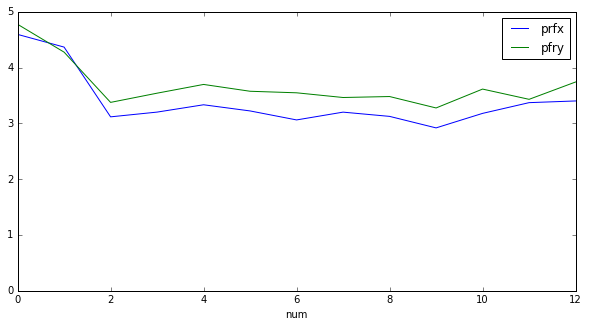

In [7]:
plt.figure(figsize=(10,6))
df1_2=df1[['num', 'prfx','pfry']]
df1_2.plot('num',['prfx','pfry'],ylim=(0.,5.),figsize=(10,5))
plt.legend(loc='upper right')
plt.show()

In [8]:
df1_no_missing = df1.dropna()

In [9]:
df1_no_missing.describe()

,num,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
count,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,6.00000,2.461538,26.307692,3.392544,3.677319,0.285885,0.544807
std,3.89444,2.125848,17.589697,0.502267,0.409934,0.160303,0.259578
min,0.00000,0.500000,5.000000,2.919461,3.276756,0.106599,0.055505
25%,3.00000,0.500000,10.000000,3.125792,3.464105,0.170638,0.374817
50%,6.00000,1.500000,21.000000,3.202541,3.548347,0.253070,0.633034
75%,9.00000,5.000000,43.000000,3.371829,3.698255,0.344703,0.732325
max,12.00000,5.000000,51.000000,4.595167,4.776331,0.669749,0.916487


## Now use the number in the filename to overwrite the num

In [10]:
import re  # use regular expression to extract the file number

In [11]:
filenames_df1=df1['file']

In [12]:
NB_OF_FILES_df1=len(filenames_df1)

In [13]:
filenumber_df1=np.zeros(NB_OF_FILES_df1,dtype='i4')

In [14]:
for id,file in enumerate(filenames_df1):
    filenumber_df1[id]=int( re.findall('^AssScImHD158485_grat_([0-9]+)',file)[0])

In [15]:
filenumber_df1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int32)

In [16]:
df1_3=df1

In [17]:
df1_3['num']=filenumber_df1

In [18]:
df1_3

,num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
0,1,AssScImHD158485_grat_1.fits,2016-05-11T05:58:59.852,1.5,32,4.595167,4.776331,0.669749,0.633034
1,2,AssScImHD158485_grat_2.fits,2016-05-11T05:59:35.430,1.5,20,4.367641,4.277105,0.253070,0.480220
2,3,AssScImHD158485_grat_3.fits,2016-05-11T06:00:39.034,1.5,21,3.117460,3.376621,0.141786,0.291356
3,4,AssScImHD158485_grat_4.fits,2016-05-11T06:04:28.397,5.0,44,3.202541,3.541572,0.253742,0.732325
4,5,AssScImHD158485_grat_5.fits,2016-05-11T06:04:37.465,5.0,40,3.333782,3.698255,0.197919,0.712457
5,6,AssScImHD158485_grat_6.fits,2016-05-11T06:04:46.678,5.0,51,3.223427,3.575975,0.227277,0.784218
6,7,AssScImHD158485_grat_7.fits,2016-05-11T06:04:55.971,5.0,43,3.062218,3.548347,0.274849,0.794322
7,8,AssScImHD158485_grat_8.fits,2016-05-11T06:05:04.595,5.0,50,3.201825,3.464105,0.518442,0.916487
8,9,AssScImHD158485_grat_9.fits,2016-05-11T06:05:58.173,0.5,7,3.125792,3.481525,0.106599,0.055505
9,10,AssScImHD158485_grat_10.fits,2016-05-11T06:06:02.576,0.5,8,2.919461,3.276756,0.170638,0.374817


In [19]:
full_dataset=df1_3

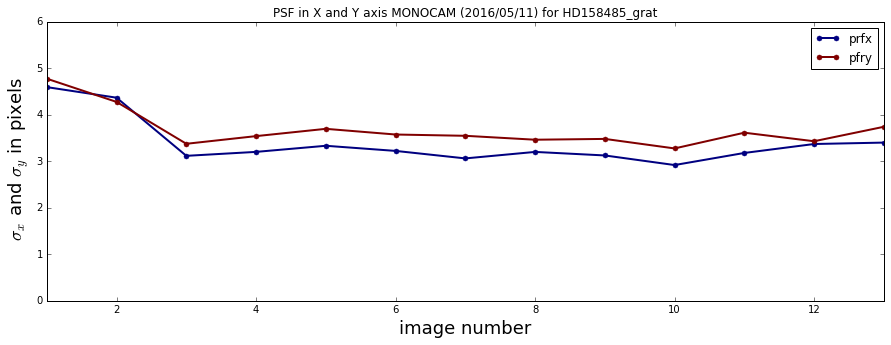

In [20]:
fig = plt.figure()
full_dataset_2=full_dataset[['num', 'prfx','pfry']]
ax=full_dataset_2.plot('num',['prfx','pfry'],lw=2,colormap='jet',marker='.',markersize=10,title='PSF in X and Y axis MONOCAM (2016/05/11) for HD158485_grat',ylim=(0.,6.),figsize=(15,5))
ax.set_xlabel("image number",fontsize=18)
ax.set_ylabel(" $\sigma_x$ and $\sigma_y$ in pixels",fontsize=18)
title='PSF in X and Y axis MONOCAM (2016/05/09) for HD158485_grat'
fig.suptitle(title, fontsize=20)
plt.legend(loc='upper right')

fig.savefig('PRFXY_HD158485_grat_20160510.jpg')
plt.show()  # pandas able to remove NaN



In [21]:
PixToArcsec=0.944

In [22]:
sigmax=full_dataset['prfx']*PixToArcsec

In [23]:
series_sigmax=pd.Series(sigmax)

In [24]:
sigmay=full_dataset['pfry']*PixToArcsec

In [25]:
series_sigmay=pd.Series(sigmay)

In [26]:
full_dataset

,num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
0,1,AssScImHD158485_grat_1.fits,2016-05-11T05:58:59.852,1.5,32,4.595167,4.776331,0.669749,0.633034
1,2,AssScImHD158485_grat_2.fits,2016-05-11T05:59:35.430,1.5,20,4.367641,4.277105,0.253070,0.480220
2,3,AssScImHD158485_grat_3.fits,2016-05-11T06:00:39.034,1.5,21,3.117460,3.376621,0.141786,0.291356
3,4,AssScImHD158485_grat_4.fits,2016-05-11T06:04:28.397,5.0,44,3.202541,3.541572,0.253742,0.732325
4,5,AssScImHD158485_grat_5.fits,2016-05-11T06:04:37.465,5.0,40,3.333782,3.698255,0.197919,0.712457
5,6,AssScImHD158485_grat_6.fits,2016-05-11T06:04:46.678,5.0,51,3.223427,3.575975,0.227277,0.784218
6,7,AssScImHD158485_grat_7.fits,2016-05-11T06:04:55.971,5.0,43,3.062218,3.548347,0.274849,0.794322
7,8,AssScImHD158485_grat_8.fits,2016-05-11T06:05:04.595,5.0,50,3.201825,3.464105,0.518442,0.916487
8,9,AssScImHD158485_grat_9.fits,2016-05-11T06:05:58.173,0.5,7,3.125792,3.481525,0.106599,0.055505
9,10,AssScImHD158485_grat_10.fits,2016-05-11T06:06:02.576,0.5,8,2.919461,3.276756,0.170638,0.374817


### simply add series as columns in the dataset

In [27]:
full_dataset['sigmax'] = series_sigmax

In [28]:
full_dataset['sigmay'] = series_sigmay

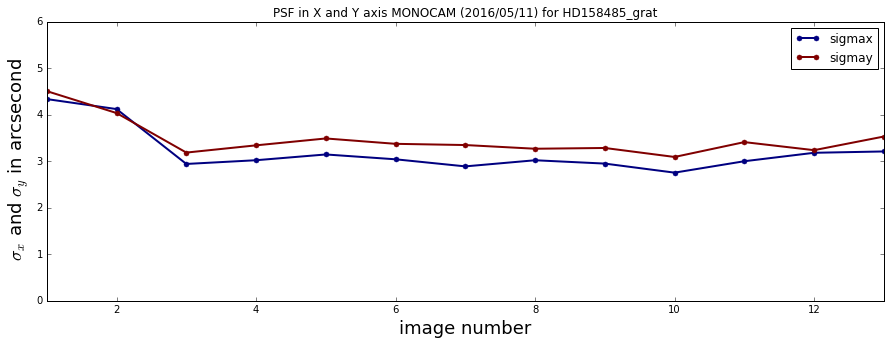

In [29]:
fig = plt.figure()
full_dataset_3=full_dataset[['num', 'sigmax','sigmay']]
ax=full_dataset_3.plot('num',['sigmax','sigmay'],lw=2,colormap='jet',marker='.',markersize=10,title='PSF in X and Y axis MONOCAM (2016/05/11) for HD158485_grat',ylim=(0.,6.),figsize=(15,5))
ax.set_xlabel("image number",fontsize=18)
ax.set_ylabel(" $\sigma_x$ and $\sigma_y$ in arcsecond",fontsize=18)
title='PSF in X and Y axis MONOCAM (2016/05/10) for HD158485_grat'
fig.suptitle(title, fontsize=20)
plt.legend(loc='upper right')
plt.show()  # pandas able to remove NaN
fig.savefig('PSFXY_HD158485_grat_20160510.jpg')

In [30]:
output_table=Table.from_pandas(full_dataset)

In [31]:
output_table

num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy,sigmax,sigmay
int32,str28,str23,float64,int32,float64,float64,float64,float64,float64,float64
1,AssScImHD158485_grat_1.fits,2016-05-11T05:58:59.852,1.5,32,4.59516684466,4.77633085449,0.669748518204,0.633033961784,4.33783750136,4.50885632664
2,AssScImHD158485_grat_2.fits,2016-05-11T05:59:35.430,1.5,20,4.36764093337,4.27710462183,0.253070362051,0.480219677255,4.1230530411,4.03758676301
3,AssScImHD158485_grat_3.fits,2016-05-11T06:00:39.034,1.5,21,3.11745978946,3.37662120697,0.141785922328,0.291356294233,2.94288204125,3.18753041938
4,AssScImHD158485_grat_4.fits,2016-05-11T06:04:28.397,5.0,44,3.20254070405,3.54157179463,0.253742310559,0.732325225588,3.02319842463,3.34324377413
5,AssScImHD158485_grat_5.fits,2016-05-11T06:04:37.465,5.0,40,3.3337821852,3.69825493689,0.197919263153,0.712456743168,3.14709038283,3.49115266042
6,AssScImHD158485_grat_6.fits,2016-05-11T06:04:46.678,5.0,51,3.22342719729,3.57597468963,0.22727713948,0.784218480413,3.04291527424,3.37572010701
7,AssScImHD158485_grat_7.fits,2016-05-11T06:04:55.971,5.0,43,3.06221826786,3.54834731387,0.274848952559,0.794321902288,2.89073404486,3.34963986429
8,AssScImHD158485_grat_8.fits,2016-05-11T06:05:04.595,5.0,50,3.20182477857,3.46410505349,0.518441965741,0.916487419153,3.02252259097,3.27011517049
9,AssScImHD158485_grat_9.fits,2016-05-11T06:05:58.173,0.5,7,3.12579168451,3.48152512138,0.106598705227,0.0555052401655,2.95074735018,3.28655971458


In [32]:
outputtablefile='HD158485_grat_1-13_TablePSF_night20160510.fits'
output_table.write(outputtablefile,format='fits')

In [33]:
t2 = Table.read(outputtablefile)

In [34]:
t2

num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy,sigmax,sigmay
int32,str28,str23,float64,int32,float64,float64,float64,float64,float64,float64
1,AssScImHD158485_grat_1.fits,2016-05-11T05:58:59.852,1.5,32,4.59516684466,4.77633085449,0.669748518204,0.633033961784,4.33783750136,4.50885632664
2,AssScImHD158485_grat_2.fits,2016-05-11T05:59:35.430,1.5,20,4.36764093337,4.27710462183,0.253070362051,0.480219677255,4.1230530411,4.03758676301
3,AssScImHD158485_grat_3.fits,2016-05-11T06:00:39.034,1.5,21,3.11745978946,3.37662120697,0.141785922328,0.291356294233,2.94288204125,3.18753041938
4,AssScImHD158485_grat_4.fits,2016-05-11T06:04:28.397,5.0,44,3.20254070405,3.54157179463,0.253742310559,0.732325225588,3.02319842463,3.34324377413
5,AssScImHD158485_grat_5.fits,2016-05-11T06:04:37.465,5.0,40,3.3337821852,3.69825493689,0.197919263153,0.712456743168,3.14709038283,3.49115266042
6,AssScImHD158485_grat_6.fits,2016-05-11T06:04:46.678,5.0,51,3.22342719729,3.57597468963,0.22727713948,0.784218480413,3.04291527424,3.37572010701
7,AssScImHD158485_grat_7.fits,2016-05-11T06:04:55.971,5.0,43,3.06221826786,3.54834731387,0.274848952559,0.794321902288,2.89073404486,3.34963986429
8,AssScImHD158485_grat_8.fits,2016-05-11T06:05:04.595,5.0,50,3.20182477857,3.46410505349,0.518441965741,0.916487419153,3.02252259097,3.27011517049
9,AssScImHD158485_grat_9.fits,2016-05-11T06:05:58.173,0.5,7,3.12579168451,3.48152512138,0.106598705227,0.0555052401655,2.95074735018,3.28655971458
